# Perceptron Model

In [ ]:
import numpy as np

def singlePerceptron(f, w):
  return w[1:]@f.transpose() + w[0]  # f[0]*w[1] + f[1]*w[2] + ... + w[0]


def classify(x):
  return np.sign(x + 1e-9) 

def updateW(currentW, f, y_star):
  fx = np.append([1], f) # f = [f[0], f[1]]     fx = [[1], f[0], f[1]] w = [[w0, w1, w2]]
  return currentW - y_star*fx

def findW(f, y):
  print("-----------------------------------------")
  print("Train")
  print("-----------------------------------------")
  w = np.array([-1, 0, 0])
  print("Initial weight:{}".format(w))
  check = 0
  epoch = 0
  while(check < len(y)):
    for i in range(len(y)):
      epoch += 1
      fx = singlePerceptron(f[i], w)
      y_star = classify(fx)
      y[i] = 1 if y[i] > 0 else -1
      # if y[i] > 0:
      #  y[i] = 1
      # else:
      #  y[i] = -1
      if (y_star == y[i]):
        check += 1
      else:
        check = 0
        w = updateW(w, f[i], y_star)
        print("Updated weight:{}".format(w))
        # w = w_new
      
  print("-----------------------------------------")
  print("Final weight:{} Epoch:{}".format(w, epoch))
  print("-----------------------------------------")
  return w

def testSinglePerceptron(f, w, name):
  print("-----------------------------------------")
  print("Test Single Perceptron {}".format(name))
  print("-----------------------------------------")
  for i in f:
    fx = singlePerceptron(i, w)
    y_star = classify(fx)
    print("Predicted output:{} \t{}".format(i, (lambda x: 0.5*(x + 1))(y_star)))
  print("-----------------------------------------")

# f = np.array([[1, 1],[3, 2],[2, 4],[3, 4],[2, 3]])
# y_target = [-1, 1, 1, 1, -1]

# w = findW(f, y_target)

# testSinglePerceptron(f, w, "Example")


In [ ]:
f = np.array([[0, 0],[0, 1],[1, 0],[1, 1]])
y_OR = [-1, 1, 1, 1]
y_NAND = [1, 1, 1, -1]
y_AND = [-1, -1, -1, 1]

w_OR = findW(f, y_OR)
w_NAND = findW(f, y_NAND)
w_AND = findW(f, y_AND)

testSinglePerceptron(f, w_OR, "OR")
testSinglePerceptron(f, w_NAND, "NAND")
testSinglePerceptron(f, w_AND, "AND")

-----------------------------------------
Train
-----------------------------------------
Initial weight:[-1  0  0]
Updated weight:[0. 0. 1.]
Updated weight:[-1.  0.  1.]
Updated weight:[0. 1. 1.]
Updated weight:[-1.  1.  1.]
-----------------------------------------
Final weight:[-1.  1.  1.] Epoch:16
-----------------------------------------
-----------------------------------------
Train
-----------------------------------------
Initial weight:[-1  0  0]
Updated weight:[0. 0. 0.]
Updated weight:[-1. -1. -1.]
Updated weight:[ 0. -1. -1.]
Updated weight:[ 1. -1.  0.]
Updated weight:[ 0. -2. -1.]
Updated weight:[ 1. -2.  0.]
Updated weight:[ 2. -1.  0.]
Updated weight:[ 1. -2. -1.]
Updated weight:[ 2. -1. -1.]
Updated weight:[ 1. -2. -2.]
Updated weight:[ 2. -2. -1.]
-----------------------------------------
Final weight:[ 2. -2. -1.] Epoch:24
-----------------------------------------
-----------------------------------------
Train
-----------------------------------------
Initial weig

# XOR Gate using Multiple perceptron

In [ ]:
def testMultiplePerceptron(f, w_OR, w_NAND, w_AND, name):
  print("-----------------------------------------")
  print("Test Multiple Perceptron {}".format(name))
  print("-----------------------------------------")
  for i in f:
    y_or = classify(singlePerceptron(i, w_OR))
    y_nand = classify(singlePerceptron(i, w_NAND))
    y_and = classify(singlePerceptron(np.array([y_or, y_nand]), w_AND))
    print("Predicted output:{} \t{}".format(i, (lambda x: 0.5*(x + 1))(y_and)))
  print("-----------------------------------------")

testMultiplePerceptron(f, w_OR, w_NAND, w_AND, "XOR")

-----------------------------------------
Test Multiple Perceptron XOR
-----------------------------------------
Predicted output:[0 0] 	0.0
Predicted output:[0 1] 	1.0
Predicted output:[1 0] 	1.0
Predicted output:[1 1] 	0.0
-----------------------------------------


# Predict continuos value

In [ ]:
def singlePerceptron(f, w):
  return w[1:]@f.transpose() + w[0]

def classify(x):
  return x

def updateW(currentW, f, err, alpha):
  fx = np.append([1], f)
  return currentW - err*fx*alpha

def findW(f, y, alpha):
  print("-----------------------------------------")
  print("Train")
  print("-----------------------------------------")
  w = np.array([-1, 0])
  print("Initial weight:{}".format(w))
  check = 0
  epoch = 0
  while(check < len(y)):
    for i in range(len(y)):
      epoch += 1
      fx = singlePerceptron(f[i], w)
      err = (fx - y[i])
      if err**2 < 1e-3: # (y_star == y[i])  y = 0.01 y1 = 0.010000000001 err = 0.000000000000000000000001
        check += 1
      else:
        check = 0
        w_new = updateW(w, f[i], err, alpha)
        # print("Updated weight:{}".format(w_new))
        w = w_new

  print("-----------------------------------------")
  print("Final weight:{} Epoch:{}".format(w, epoch))
  print("-----------------------------------------")
  return w

def testSinglePerceptron(f, w, name):
  print("-----------------------------------------")
  print("Test Single Perceptron {}".format(name))
  print("-----------------------------------------")
  for i in f:
    fx = singlePerceptron(i, w)
    y_star = classify(fx)
    print("Predicted output:{}  \t{:.1f}".format(i, y_star))
  print("-----------------------------------------")



In [ ]:
f = np.array([[0], [1], [2], [3], [4]])
y_target = [32, 33.8, 35.6, 37.4, 39.2]
alpha = 1e-2

w = findW(f, y_target, alpha)

testSinglePerceptron(f, w, "C to F")

-----------------------------------------
Train
-----------------------------------------
Initial weight:[-1  0]
-----------------------------------------
Final weight:[31.96843668  1.81561841] Epoch:2375
-----------------------------------------
-----------------------------------------
Test Single Perceptron C to F
-----------------------------------------
Predicted output:[0]  	32.0
Predicted output:[1]  	33.8
Predicted output:[2]  	35.6
Predicted output:[3]  	37.4
Predicted output:[4]  	39.2
-----------------------------------------


In [ ]:
f = np.array([[32],[33.8],[35.6],[37.4],[39.2]])
y_target = [0, 1, 2, 3, 4]
alpha = 1e-3

w = findW(f, y_target, alpha)

testSinglePerceptron(f, w, "F to C")

-----------------------------------------
Train
-----------------------------------------
Initial weight:[-1  0]
-----------------------------------------
Final weight:[-17.64251058   0.5512982 ] Epoch:1136450
-----------------------------------------
-----------------------------------------
Test Single Perceptron F to C
-----------------------------------------
Predicted output:[32.]  	-0.0
Predicted output:[33.8]  	1.0
Predicted output:[35.6]  	2.0
Predicted output:[37.4]  	3.0
Predicted output:[39.2]  	4.0
-----------------------------------------


# ANN using Keras

Finished training the model
These are the layer variables: [array([[1.8000498]], dtype=float32), array([31.999853], dtype=float32)]
-----------------------------------------
Test Neural C to F
-----------------------------------------
Predicted output:0  	32.0
Predicted output:1  	33.8
Predicted output:2  	35.6
Predicted output:3  	37.4
Predicted output:4  	39.2
-----------------------------------------
None


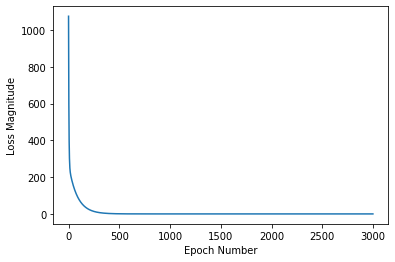

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def testNeural(model, f, name):
  print("-----------------------------------------")
  print("Test Neural {}".format(name))
  print("-----------------------------------------")
  for i in f:
    y_star = model.predict(np.array([i]))
    print("Predicted output:{}  \t{:.1f}".format(i, y_star[0][0]))
  print("-----------------------------------------")


celsius_q    = np.array([0, 1,  2,  3, 4])
fahrenheit_a = np.array([32, 33.8, 35.6, 37.4, 39.2])

l0 = tf.keras.layers.Dense(units=1, input_shape=[1])
model = tf.keras.Sequential([l0])

model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.SGD(learning_rate=1e-2))
history = model.fit(celsius_q, fahrenheit_a, epochs=3000, verbose=False)
print("Finished training the model")
print("These are the layer variables: {}".format(l0.get_weights()))

print(testNeural(model, celsius_q, "C to F"))

plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])


In [ ]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])
l1 = tf.keras.layers.Dense(units=2)

model = tf.keras.Sequential([l0,l1])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3)) 
history = model.fit(celsius_q,fahrenheit_a, epochs=500, verbose=False)
print("Finished trining the model")
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))

print(testNeural(model, celsius_q, "C to F"))


plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])


# LAB 09
1. Use keras for implement F to C converter
2. Use keras for implement XOR Gate

In [ ]:
#Juntorn Thiantanukij 2021610213
from keras.models import Sequential
from keras.layers.core import Dense

Finished training the model
-----------------------------------------
Test Neural F to C
-----------------------------------------
Predicted output:32.0  	0.0
Predicted output:33.8  	1.0
Predicted output:35.6  	2.0
Predicted output:37.4  	3.0
Predicted output:39.2  	4.0
-----------------------------------------
None


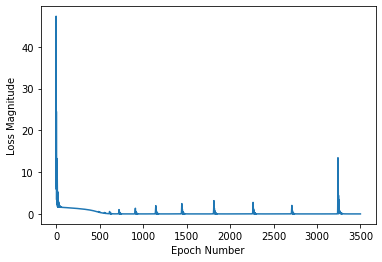

In [ ]:
#1. F to C Converter

def newtestNeural(model, f, name):
  print("-----------------------------------------")
  print("Test Neural {}".format(name))
  print("-----------------------------------------")
  for i in f:
    y_star = model.predict(np.array([i]))
    print("Predicted output:{}  \t{:.1f}".format(i, y_star[0][0]))
  print("-----------------------------------------")

celsius_q    = np.array([0, 1,  2,  3, 4], dtype=float)
fahrenheit_a = np.array([32, 33.8, 35.6, 37.4, 39.2], dtype=float)

l0 = tf.keras.layers.Dense(units=1000000, input_shape=[1])
l1 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0,l1])

model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['mean_squared_error'])
history = model.fit(fahrenheit_a, celsius_q, epochs=3500, verbose=False)
print("Finished training the model")

#print("These are the l0 variables: {}".format(l0.get_weights()))
#print("")
#print("These are the l1 variables: {}".format(l1.get_weights()))

print(newtestNeural(model, fahrenheit_a, "F to C"))

plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])


Epoch 1/100
1/1 [==============================] - 1s 945ms/step - loss: 0.2500 - binary_accuracy: 0.7500
Epoch 2/100
1/1 [==============================] - 0s 363ms/step - loss: 0.4073 - binary_accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 423ms/step - loss: 0.1718 - binary_accuracy: 0.7500
Epoch 4/100
1/1 [==============================] - 0s 360ms/step - loss: 0.2261 - binary_accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 379ms/step - loss: 0.0511 - binary_accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 372ms/step - loss: 0.1159 - binary_accuracy: 0.7500
Epoch 7/100
1/1 [==============================] - 0s 368ms/step - loss: 0.0292 - binary_accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 376ms/step - loss: 0.0057 - binary_accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 0s 376ms/step - loss: 6.4643e-04 - binary_accuracy: 1.0000
Epoch 10/100
1/1 [========================

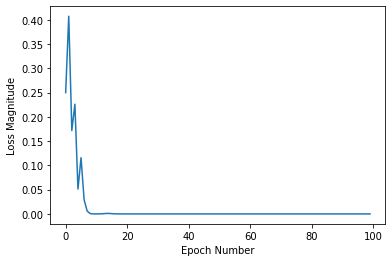

In [ ]:
# XOR Gate
f = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")
y = np.array([[0],[1],[1],[0]], "float32")

model = Sequential()
#model.add(Dense(units=1000000, input_dim=2, activation='relu'))
model.add(Dense(units=10000000, input_dim=2, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
#model.add(Dense(units=1, activation='tanh'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['binary_accuracy'])

history = model.fit(f, y, epochs=100)
print(model.predict(f).round())

plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])
